0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
10 4
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
10 7
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
8 8
9 8
10 8
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
10 9
0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10


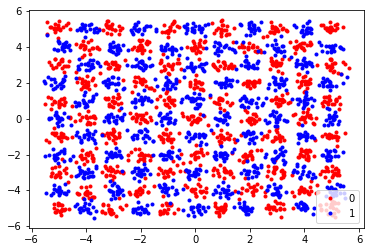

In [1]:
import numpy as np
import matplotlib.pyplot as plt

samples_per_cluster = 20
range_len = 10
var = 0.05

X = np.zeros(((range_len + 1) ** 2 * samples_per_cluster, 2))
y = np.zeros((range_len + 1) ** 2 * samples_per_cluster)
for x_cord in range(0, range_len + 1):
    for y_cord in range(0, range_len + 1):
        print(y_cord, x_cord)
        X[(y_cord + x_cord * (range_len + 1)) * samples_per_cluster:(y_cord + x_cord * (range_len + 1) + 1) * samples_per_cluster] = np.random.multivariate_normal(
            (x_cord - int(range_len / 2), y_cord - int(range_len / 2)), cov=[[var, 0], [0, var]], size=samples_per_cluster)
        y[(y_cord + x_cord * (range_len + 1)) * samples_per_cluster:(y_cord + x_cord * (range_len + 1) + 1) * samples_per_cluster] = (x_cord + y_cord) % 2

plt.plot(X[y == 0, 0], X[y == 0, 1], 'r.', label='0')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'b.', label='1')
plt.legend()
plt.show()

In [11]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.4819214876033058
0.5020661157024794


In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.45454545454545453
0.9591942148760331


In [18]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.5087809917355371
0.493801652892562


In [19]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.5041322314049587
0.5041322314049587
